In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import msprime
import tsinfer
from IPython.display import SVG, display

/home/wilderwohns/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [150]:
ts_sim=msprime.load("/home/wilderwohns/relative_allele_age/data/new_test_dir_again/simulated_ts")

In [152]:
bins=np.arange(0,ts_sim.get_sequence_length(),500)

In [154]:
results = np.zeros((100, 5))

In [155]:
results[:,4]=np.digitize(results[:,1],bins)

In [158]:
len(bins)

20

# Load Files

In [53]:
sample_1000_length_1e5_rec_2e8=pd.read_csv("../data/sample_1000_length_1e5_rec_2e-8",header=None)
sample_500_length_1e5_rec_2e8=pd.read_csv("../data/sample_500_length_1e5_rec_2e-8",header=None)
sample_100_length_1e5_rec_2e8=pd.read_csv("../data/sample_100_length_1e5_rec_2e-8",header=None)

sample_1000_length_5e4_rec_2e8=pd.read_csv("../data/sample_1000_length_5e4_rec_2e-8",header=None)
sample_500_length_5e4_rec_2e8=pd.read_csv("../data/sample_500_length_5e4_rec_2e-8",header=None)
sample_100_length_5e4_rec_2e8=pd.read_csv("../data/sample_100_length_5e4_rec_2e-8",header=None)

sample_100_length_25e3_rec_2e8=pd.read_csv("../data/sample_100_length_25e3_rec_2e-8",header=None)

#variable mut rates
sample_1000_length_5e4_mut_2e7=pd.read_csv("../data/sample1000_length5e4_mutrate_2e7/summary_stats",header=None)
sample_1000_length_5e4_mut_2e8=pd.read_csv("../data/sample1000_length5e4_mutrate_2e8/summary_stats",header=None)
sample_1000_length_5e4_mut_2e9=pd.read_csv("../data/sample1000_length5e4_mutrate_2e9/summary_stats",header=None)

#variable mut rates with all distances between pairs
sample_1000_length_5e4_mut_2e7_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/summary_stats",header=None)
sample_1000_length_5e4_mut_25e8_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/summary_stats",header=None)
sample_1000_length_5e4_mut_2e8_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/summary_stats",header=None)
sample_1000_length_5e4_mut_25e9_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/summary_stats",header=None)
sample_1000_length_5e4_mut_2e9_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/summary_stats",header=None)

sample_1000_length_1e5_mut_2e7_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/summary_stats",header=None)
sample_1000_length_1e5_mut_25e8=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/summary_stats",header=None)
sample_1000_length_1e5_mut_2e8_incl_all_distances=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/summary_stats',header=None)
sample_1000_length_1e5_mut_25e9=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/summary_stats",header=None)
sample_1000_length_1e5_mut_2e9_incl_all_distances=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/summary_stats',header=None)




# Accuracy of Frequency vs. GEVA

In [3]:
length_1e5_rec_2e8=np.zeros((3,4))

#add the means
length_1e5_rec_2e8[0,0:2]=sample_100_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[1,0:2]=sample_500_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[2,0:2]=sample_1000_length_1e5_rec_2e8.mean(0)[0:2]

#add the standard deviations
length_1e5_rec_2e8[0,2:4]=sample_100_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[1,2:4]=sample_500_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[2,2:4]=sample_1000_length_1e5_rec_2e8.std(0)[0:2]

In [4]:
length_5e4_rec_2e8=np.zeros((3,2))
length_5e4_rec_2e8[0,0]=sample_100_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[0,1]=sample_100_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[1,0]=sample_500_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[1,1]=sample_500_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[2,0]=sample_1000_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[2,1]=sample_1000_length_5e4_rec_2e8.mean(0)[1]

In [5]:
length_25e3_rec_2e8=np.zeros((1,2))
length_25e3_rec_2e8[0,0]=sample_100_length_25e3_rec_2e8.mean(0)[0]
length_25e3_rec_2e8[0,1]=sample_100_length_25e3_rec_2e8.mean(0)[1]

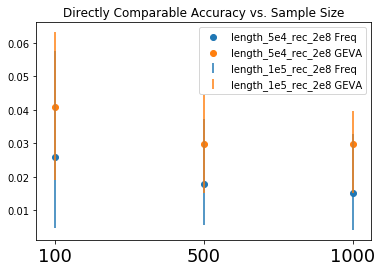

In [6]:
fig, ax = plt.subplots(1,1)
x=[0,1,2]

ax.errorbar(x, length_1e5_rec_2e8[:,0], yerr=2*length_1e5_rec_2e8[:,2], linestyle='',label='length_1e5_rec_2e8 Freq')
#ax.scatter(x,length_1e5_rec_2e8[:,0],label='length_1e5_rec_2e8 Freq')
ax.errorbar(x, length_1e5_rec_2e8[:,1], yerr=2*length_1e5_rec_2e8[:,3], linestyle='',label='length_1e5_rec_2e8 GEVA')
#ax.scatter(x,length_1e5_rec_2e8[:,1],label='length_1e5_rec_2e8 GEVA')

ax.scatter(x,length_5e4_rec_2e8[:,0],label='length_5e4_rec_2e8 Freq')
ax.scatter(x,length_5e4_rec_2e8[:,1],label='length_5e4_rec_2e8 GEVA')

#ax.scatter([0],length_25e3_rec_2e8[:,0],label='length_25e3_rec_2e8 Freq')
#ax.scatter([0],length_25e3_rec_2e8[:,1],label='length_25e3_rec_2e8 GEVA')

x_ticks_labels = ['100','500','1000']

# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=18)
ax.set_title("Directly Comparable Accuracy vs. Sample Size")
ax.legend()
plt.savefig("Directly Comparable Accuracy vs Sample Size")

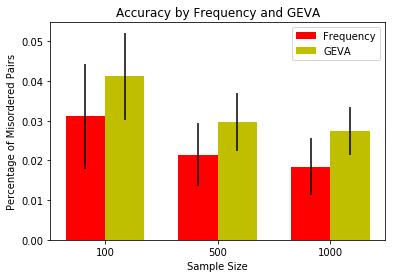

In [7]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""

N = 3
freq_means = length_1e5_rec_2e8[:,0]
freq_std = length_1e5_rec_2e8[:,2]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, freq_means, width, color='r', yerr=freq_std)

geva_means = length_1e5_rec_2e8[:,1]
geva_std = length_1e5_rec_2e8[:,3]
rects2 = ax.bar(ind + width, geva_means, width, color='y', yerr=geva_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Misordered Pairs')
ax.set_title('Accuracy by Frequency and GEVA')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('100', '500', '1000'))
ax.set_xlabel("Sample Size")

ax.legend((rects1[0], rects2[0]), ('Frequency', 'GEVA'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
plt.savefig("Bar Plot Accuracy by Frequency and GEVA")
plt.show()


In [8]:
length_1e5_rec_2e8

array([[0.0311076 , 0.04115634, 0.01318467, 0.01100291],
       [0.02146227, 0.02976022, 0.0078419 , 0.00732775],
       [0.01844128, 0.02738279, 0.00712563, 0.00614444]])

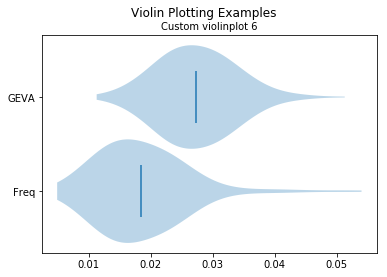

In [9]:
fig, ax = plt.subplots()

ax.violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=False, showmedians=False,
                      bw_method=0.5)
# ax.violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
# ax.violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
ax.set_title('Custom violinplot 6', fontsize=10)
ax.set_yticks([0,1])
ax.set_yticklabels(('Freq', 'GEVA'))


fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

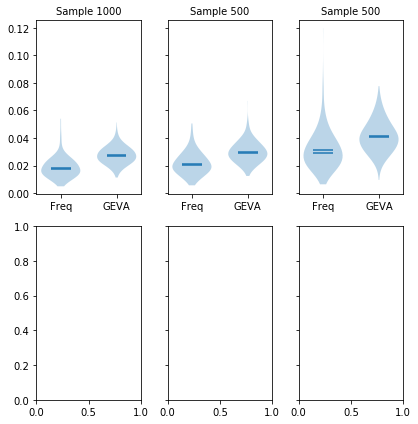

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey='row')

axes[0,0].violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,0].set_title('Sample 1000', fontsize=10)
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(('Freq', 'GEVA'))

axes[0,1].violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,1].set_title('Sample 500', fontsize=10)
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(('Freq', 'GEVA'))

axes[0,2].violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,2].set_title('Sample 500', fontsize=10)
axes[0,2].set_xticks([0,1])
axes[0,2].set_xticklabels(('Freq', 'GEVA'))




fig.subplots_adjust(hspace=0.4)
fig.tight_layout()
plt.show()



## Showing difference in mutation rates

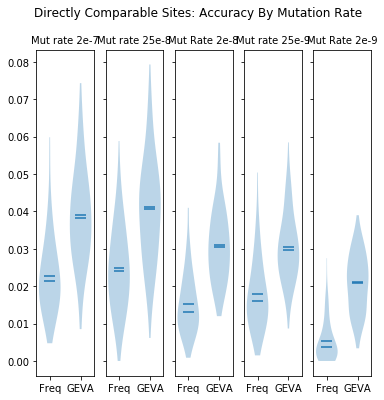

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 6), sharey='row')

axes[0].violinplot(sample_1000_length_5e4_mut_2e7.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0].set_title('Mut rate 2e-7', fontsize=10)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(('Freq', 'GEVA'))

axes[1].violinplot(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[1].set_title('Mut rate 25e-8', fontsize=10)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(('Freq', 'GEVA'))

axes[2].violinplot(sample_1000_length_5e4_mut_2e8.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[2].set_title('Mut Rate 2e-8', fontsize=10)
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(('Freq', 'GEVA'))

axes[3].violinplot(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[3].set_title('Mut rate 25e-9', fontsize=10)
axes[3].set_xticks([0,1])
axes[3].set_xticklabels(('Freq', 'GEVA'))

axes[4].violinplot(sample_1000_length_5e4_mut_2e9.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[4].set_title('Mut Rate 2e-9', fontsize=10)
axes[4].set_xticks([0,1])
axes[4].set_xticklabels(('Freq', 'GEVA'))

fig.subplots_adjust(hspace=0.4)

fig.suptitle("Directly Comparable Sites: Accuracy By Mutation Rate")
#fig.tight_layout()
plt.show()

All sites (not just directly comparable):

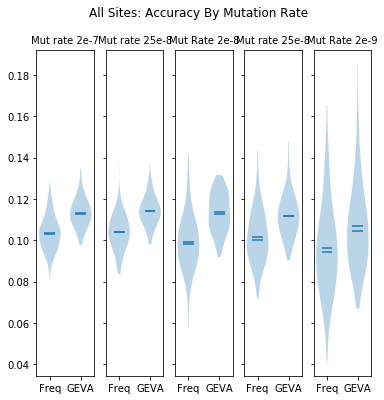

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 6), sharey='row')

all_accuracy_2e7_freq=sample_1000_length_5e4_mut_2e7.iloc[:,1]/(sample_1000_length_5e4_mut_2e7.iloc[:,0]+sample_1000_length_5e4_mut_2e7.iloc[:,1])
all_accuracy_2e7_geva=sample_1000_length_5e4_mut_2e7.iloc[:,3]/(sample_1000_length_5e4_mut_2e7.iloc[:,2]+sample_1000_length_5e4_mut_2e7.iloc[:,3])
axes[0].violinplot([all_accuracy_2e7_freq,all_accuracy_2e7_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0].set_title('Mut rate 2e-7', fontsize=10)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_25e8_freq=sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,1]/(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,0]+sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,1])
all_accuracy_25e8_geva=sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,3]/(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,2]+sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,3])
axes[1].violinplot([all_accuracy_25e8_freq,all_accuracy_25e8_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[1].set_title('Mut rate 25e-8', fontsize=10)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_2e8_freq=sample_1000_length_5e4_mut_2e8.iloc[:,1]/(sample_1000_length_5e4_mut_2e8.iloc[:,0]+sample_1000_length_5e4_mut_2e8.iloc[:,1])
all_accuracy_2e8_geva=sample_1000_length_5e4_mut_2e8.iloc[:,3]/(sample_1000_length_5e4_mut_2e8.iloc[:,2]+sample_1000_length_5e4_mut_2e8.iloc[:,3])
axes[2].violinplot([all_accuracy_2e8_freq,all_accuracy_2e8_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[2].set_title('Mut Rate 2e-8', fontsize=10)
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_25e9_freq=sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,1]/(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,0]+sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,1])
all_accuracy_25e9_geva=sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,3]/(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,2]+sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,3])
axes[3].violinplot([all_accuracy_25e9_freq,all_accuracy_25e9_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[3].set_title('Mut rate 25e-8', fontsize=10)
axes[3].set_xticks([0,1])
axes[3].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_2e9_freq=sample_1000_length_5e4_mut_2e9.iloc[:,1]/(sample_1000_length_5e4_mut_2e9.iloc[:,0]+sample_1000_length_5e4_mut_2e9.iloc[:,1])
all_accuracy_2e9_geva=sample_1000_length_5e4_mut_2e9.iloc[:,3]/(sample_1000_length_5e4_mut_2e9.iloc[:,2]+sample_1000_length_5e4_mut_2e9.iloc[:,3])
axes[4].violinplot([all_accuracy_2e9_freq,all_accuracy_2e9_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[4].set_title('Mut Rate 2e-9', fontsize=10)
axes[4].set_xticks([0,1])
axes[4].set_xticklabels(('Freq', 'GEVA'))

fig.suptitle("All Sites: Accuracy By Mutation Rate")
fig.subplots_adjust(hspace=0.4)
#fig.tight_layout()
plt.show()

# Plot Average Distance Separating Mutations (only directly comparable though)

In [14]:
length_1e5_rec_2e8=np.zeros((3,3))
length_1e5_rec_2e8[0,0]=sample_100_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[0,1]=sample_100_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[0,2]=sample_100_length_1e5_rec_2e8.mean(0)[4]
length_1e5_rec_2e8[1,0]=sample_500_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[1,1]=sample_500_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[1,2]=sample_500_length_1e5_rec_2e8.mean(0)[4]
length_1e5_rec_2e8[2,0]=sample_1000_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[2,1]=sample_1000_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[2,2]=sample_1000_length_1e5_rec_2e8.mean(0)[4]

length_5e4_rec_2e8=np.zeros((3,3))
length_5e4_rec_2e8[0,0]=sample_100_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[0,1]=sample_100_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[0,2]=sample_100_length_5e4_rec_2e8.mean(0)[4]
length_5e4_rec_2e8[1,0]=sample_500_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[1,1]=sample_500_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[1,2]=sample_500_length_5e4_rec_2e8.mean(0)[4]
length_5e4_rec_2e8[2,0]=sample_1000_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[2,1]=sample_1000_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[2,2]=sample_1000_length_5e4_rec_2e8.mean(0)[4]

Text(0.5,1,'Average Distance Separating Mutations: Length 1e5')

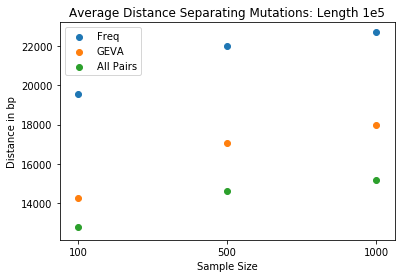

In [15]:
plt.scatter([0,1,2],length_1e5_rec_2e8[:,0],label="Freq")
plt.scatter([0,1,2],length_1e5_rec_2e8[:,1],label="GEVA")
plt.scatter([0,1,2],length_1e5_rec_2e8[:,2],label="All Pairs")

plt.xticks([0,1,2], ('100', '500','1000'))
plt.xlabel("Sample Size")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations: Length 1e5")

Text(0.5,1,'Average Distance Separating Mutations: Length 5e4')

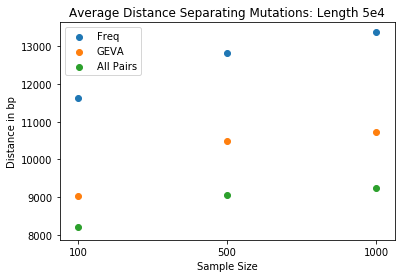

In [16]:
plt.scatter([0,1,2],length_5e4_rec_2e8[:,0],label="Freq")
plt.scatter([0,1,2],length_5e4_rec_2e8[:,1],label="GEVA")
plt.scatter([0,1,2],length_5e4_rec_2e8[:,2],label="All Pairs")

plt.xticks([0,1,2], ('100', '500','1000'))
plt.xlabel("Sample Size")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations: Length 5e4")

## Same thing for different mutation rate schemes

In [17]:
sample_1000_length_5e4_mut_rates=np.zeros((5,3))
sample_1000_length_5e4_mut_rates[0,0]=sample_1000_length_5e4_mut_2e7.mean(0)[6]
sample_1000_length_5e4_mut_rates[0,1]=sample_1000_length_5e4_mut_2e7.mean(0)[7]
sample_1000_length_5e4_mut_rates[0,2]=sample_1000_length_5e4_mut_2e7.mean(0)[8]

sample_1000_length_5e4_mut_rates[1,0]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[6]
sample_1000_length_5e4_mut_rates[1,1]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[7]
sample_1000_length_5e4_mut_rates[1,2]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[8]

sample_1000_length_5e4_mut_rates[2,0]=sample_1000_length_5e4_mut_2e8.mean(0)[6]
sample_1000_length_5e4_mut_rates[2,1]=sample_1000_length_5e4_mut_2e8.mean(0)[7]
sample_1000_length_5e4_mut_rates[2,2]=sample_1000_length_5e4_mut_2e8.mean(0)[8]

sample_1000_length_5e4_mut_rates[3,0]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[6]
sample_1000_length_5e4_mut_rates[3,1]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[7]
sample_1000_length_5e4_mut_rates[3,2]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[8]

sample_1000_length_5e4_mut_rates[4,0]=sample_1000_length_5e4_mut_2e9.mean(0)[6]
sample_1000_length_5e4_mut_rates[4,1]=sample_1000_length_5e4_mut_2e9.mean(0)[7]
sample_1000_length_5e4_mut_rates[4,2]=sample_1000_length_5e4_mut_2e9.mean(0)[8]

In [59]:
sample_1000_length_1e5_mut_rates=np.zeros((5,3))
sample_1000_length_1e5_mut_rates[0,0]=sample_1000_length_1e5_mut_25e8_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[0,1]=sample_1000_length_1e5_mut_25e8_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[0,2]=sample_1000_length_1e5_mut_25e8_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[1,0]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[1,1]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[1,2]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[2,0]=sample_1000_length_1e5_mut_25e9_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[2,1]=sample_1000_length_1e5_mut_25e9_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[2,2]=sample_1000_length_1e5_mut_25e9_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[3,0]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[3,1]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[3,2]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[4,0]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[4,1]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[4,2]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[8]

In [60]:
sample_1000_length_5e4_mut_rates

array([[ 6726.27695216,  5450.01416301,  4238.62833626],
       [ 6638.65276228,  4944.99089936,  3880.06951065],
       [13647.08156849, 11023.59339513,  9231.55673691],
       [12057.1104787 ,  9939.43124974,  8617.73053251],
       [20845.82050711, 15494.5289681 , 14581.92159966]])

Text(0.5,1,'Average Distance Separating Mutations')

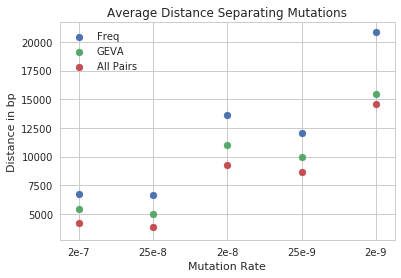

In [61]:
plt.scatter([0,1,2,3,4],sample_1000_length_5e4_mut_rates[:,0],label="Freq")
plt.scatter([0,1,2,3,4],sample_1000_length_5e4_mut_rates[:,1],label="GEVA")
plt.scatter([0,1,2,3,4],sample_1000_length_5e4_mut_rates[:,2],label="All Pairs")

plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations")

Text(0.5,1,'Average Distance Separating Mutations')

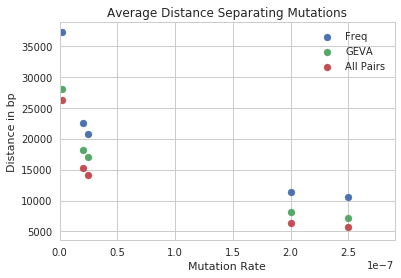

In [97]:
plt.scatter([0.00000025,0.0000002,0.000000025,0.00000002,0.000000002],sample_1000_length_1e5_mut_rates[:,0],label="Freq")
plt.scatter([0.00000025,0.0000002,0.000000025,0.00000002,0.000000002],sample_1000_length_1e5_mut_rates[:,1],label="GEVA")
plt.scatter([0.00000025,0.0000002,0.000000025,0.00000002,0.000000002],sample_1000_length_1e5_mut_rates[:,2],label="All Pairs")
plt.xlim(0.0000000001,0.00000029)
#plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations")

ValueError: x and y must be the same size

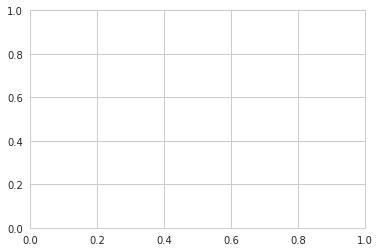

In [136]:
plt.scatter([2e-7,1.1e-7,2e-8,1.1e-8,2e-9],sample_1000_length_1e5_mut_rates[:,0],label="Freq")

# plt.scatter([0.00000025,0.0000002,0.000000025,0.00000002,0.000000002],sample_1000_length_1e5_mut_rates[:,1],label="GEVA")
# plt.scatter([0.00000025,0.0000002,0.000000025,0.00000002,0.000000002],sample_1000_length_1e5_mut_rates[:,2],label="All Pairs")
plt.xlim(2e-7,2e-9)
#plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations")

In [145]:
import math
print(math.log(2e-7),math.log(6.325e-8),math.log(2e-8),math.log(6.32e-9),math.log(2e-9))

print(math.log(2e-9)-math.log(6.32e-9))
print(math.log(6.32e-9)-math.log(2e-8))
print(math.log(2e-8)-math.log(6.325e-8))
print(math.log(6.325e-8)-math.log(2e-7))


-15.424948470398375 -16.576170709338783 -17.72753356339242 -18.879546628787644 -20.030118656386467
-1.1505720275988232
-1.1520130653952236
-1.1513628540536374
-1.1512222389404076


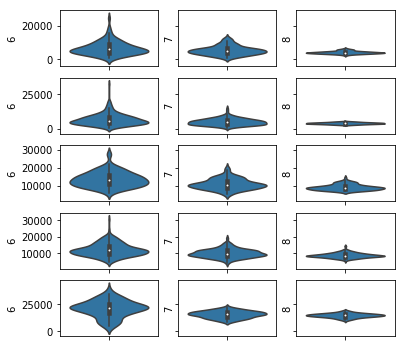

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(6, 6), sharey='row')
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[6],ax=axes[0,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[7],ax=axes[0,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[8],ax=axes[0,2])

sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[6],ax=axes[1,0])
sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[7],ax=axes[1,1])
sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[8],ax=axes[1,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e8[6],ax=axes[2,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8[7],ax=axes[2,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8[8],ax=axes[2,2])

sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[6],ax=axes[3,0])
sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[7],ax=axes[3,1])
sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[8],ax=axes[3,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e9[6],ax=axes[4,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9[7],ax=axes[4,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9[8],ax=axes[4,2])

## Now same for all sites

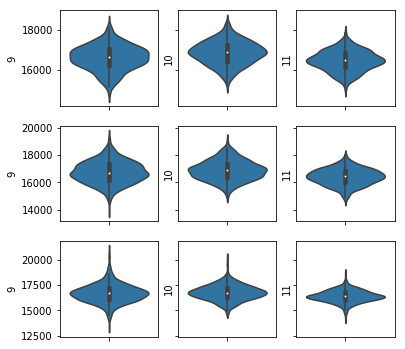

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6), sharey='row')
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[9],ax=axes[0,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[10],ax=axes[0,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[11],ax=axes[0,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[9],ax=axes[1,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[10],ax=axes[1,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[11],ax=axes[1,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[9],ax=axes[2,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[10],ax=axes[2,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[11],ax=axes[2,2])

# Plotting frequency vs. accuracy

In [22]:
import matplotlib.pyplot as plt

import csv

all_freqs=np.empty(0)

with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/all_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        all_freqs=np.append(all_freqs,row)

freq_freqs=np.empty(0)   
with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/freq_misordered_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        freq_freqs=np.append(freq_freqs,row)

geva_freqs=np.empty(0)
with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/geva_misordered_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        geva_freqs=np.append(geva_freqs,row)


(array([113433.,  18821.,   9832.,   7982.,   5517.,   4054.,   2086.,
          1967.,   1356.,   1704.]),
 array([0.002 , 0.1017, 0.2014, 0.3011, 0.4008, 0.5005, 0.6002, 0.6999,
        0.7996, 0.8993, 0.999 ]),
 <a list of 10 Patch objects>)

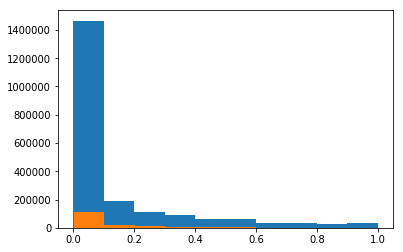

In [23]:
plt.hist(all_freqs)
plt.hist(freq_freqs)

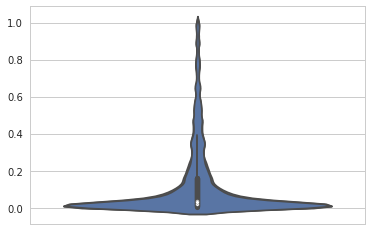

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.violinplot(y=all_freqs)
ax=sns.violinplot(y=freq_freqs)
ax = sns.violinplot(y=all_freqs)
ax = sns.violinplot(y=geva_freqs)

# Accuracy by Distance

In [37]:
sample_1000_length_5e4_mut_2e7_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/freq_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e7_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/freq_accuracy_by_distance",delimiter=",")


In [105]:
sample_1000_length_5e4_mut_2e7_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/geva_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e7_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/geva_accuracy_by_distance",delimiter=",")


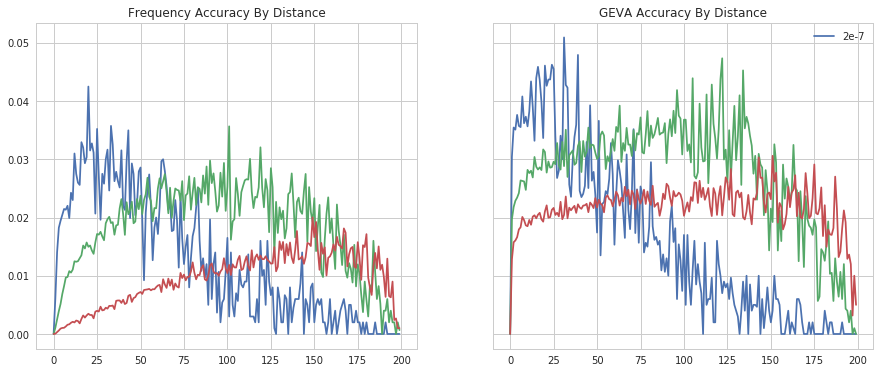

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')

axes[0].plot(sample_1000_length_5e4_mut_2e7_incl_all_distances_freq_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_5e4_mut_25e8_incl_all_distances_freq_distance.mean(0),label="25e-8")
axes[0].plot(sample_1000_length_5e4_mut_2e8_incl_all_distances_freq_distance.mean(0))
#plt.plot(sample_1000_length_5e4_mut_25e9_incl_all_distances_freq_distance.mean(0))
axes[0].plot(sample_1000_length_5e4_mut_2e9_incl_all_distances_freq_distance.mean(0))
axes[0].set_title("Frequency Accuracy By Distance")

axes[1].plot(sample_1000_length_5e4_mut_2e7_incl_all_distances_geva_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_5e4_mut_25e8_incl_all_distances_geva_distance.mean(0))
axes[1].plot(sample_1000_length_5e4_mut_2e8_incl_all_distances_geva_distance.mean(0))
#plt.plot(sample_1000_length_5e4_mut_25e9_incl_all_distances_geva_distance.mean(0))
axes[1].plot(sample_1000_length_5e4_mut_2e9_incl_all_distances_geva_distance.mean(0))
axes[1].set_title("GEVA Accuracy By Distance")
plt.legend()

Text(0.5,1,'GEVA Accuracy By Distance')

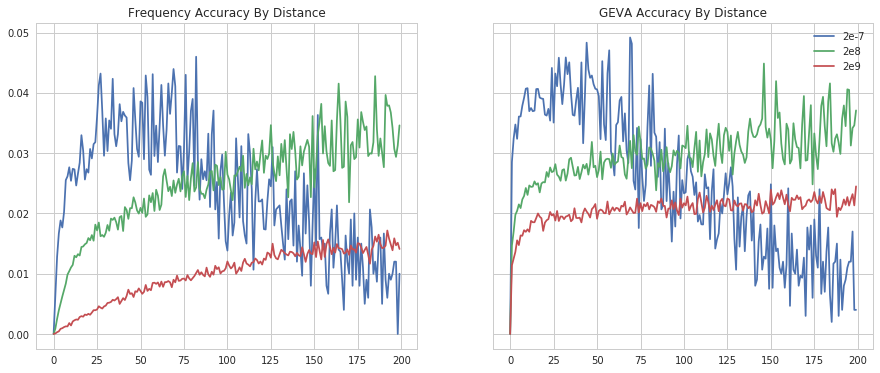

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')

axes[0].plot(sample_1000_length_1e5_mut_2e7_incl_all_distances_freq_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_1e5_mut_25e8_incl_all_distances_freq_distance.mean(0),label="25e-8")
axes[0].plot(sample_1000_length_1e5_mut_2e8_incl_all_distances_freq_distance.mean(0),label="2e8")
#plt.plot(sample_1000_length_1e5_mut_25e9_incl_all_distances_freq_distance.mean(0),label="25e9")
axes[0].plot(sample_1000_length_1e5_mut_2e9_incl_all_distances_freq_distance.mean(0),label="2e9")
axes[0].set_title("Frequency Accuracy By Distance")

axes[1].plot(sample_1000_length_1e5_mut_2e7_incl_all_distances_geva_distance.mean(0),label="2e-7")
axes[1].plot(sample_1000_length_1e5_mut_2e8_incl_all_distances_geva_distance.mean(0),label="2e8")
axes[1].plot(sample_1000_length_1e5_mut_2e9_incl_all_distances_geva_distance.mean(0),label="2e9")
plt.legend()
axes[1].set_title("GEVA Accuracy By Distance")

# What's overlap between what frequency gets wrong and what geva gets wrong?

# Tree imbalance statistic

In [54]:
#colless statistic
simulated_ts=msprime.load("../data/new_test_dir_again/simulated_ts")
colless_indices=list()
for tree in simulated_ts.trees():
    colless_index=0
    for node in tree.nodes():
        children=tree.get_children(node)
        if children != ():
            colless_index=colless_index+abs(len(list(tree.get_leaves(children[0])))-len(list(tree.get_leaves(children[1]))))
    colless_indices.append(colless_index)
print(colless_indices)

[5, 4, 4, 4, 6, 6, 17, 9, 17, 9, 9, 9, 9, 9, 9, 17, 17]


In [82]:
#sackin's statistic
#add the number of internal nodes between each leaf of the tree and the root (inclusive)
for tree in simulated_ts.trees():
    sackin_stat=list()
    for leaf in list(tree.leaves()):
        cur_leaf=0
        cur_node=tree.parent(leaf)
        while cur_node != -1:
            cur_node=tree.parent(cur_node)
            cur_leaf=cur_leaf+1
        sackin_stat.append(cur_leaf)
    print(np.var(sackin_stat))

0.45
0.24000000000000005
0.24000000000000005
0.24000000000000005
0.6400000000000001
0.6400000000000001
2.69
1.21
2.69
1.21
1.21
1.21
1.21
1.21
1.21
2.69
2.69


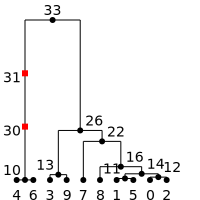

In [73]:
display(SVG(tree.draw()))

In [99]:
mutations=list(np.ndenumerate(np.loadtxt("../data/new_test_dir_again/freq_matrix")))


for tree in simulated_ts.trees():
    num_mut_pairs_tree=0
    num_misordered_pairs_tre
    for mutation in tree.mutations():
        len([item for item in mutations if item[0][0] == mutation.id])





            